<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg as la

# Define a simple gram schmidt algorithm for QR Decomp to use
def gram_schmidt(A):
  # Create matrices and set their types as necessary otherwise you get an error
  # in next code segment (Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind')
  A = A.astype("float64")
  V = np.copy(A.astype("float64"))
  U = np.zeros(A.shape)

  # Normalize first column and copy it to output matrix
  U[:, 0] = A[:, 0] / la.norm(A[:, 0])

  # Iterate through the columns
  for col in range(1, V.shape[1]):
    # Grab the current column
    u_k = A[:, col]

    # Iterate through the columns to the left
    for col_l in range(col):
      # Subtract the projection from the current column
      u_k -= (( np.dot(V[:, col_l], A[:, col]) / np.dot(V[:, col_l], V[:, col_l]) ) * V[:, col_l])

    # Add new column to V, this is necessary to maintain the above for loop since it uses V's previous columns
    # Say we are on column 3, the above will loop through columns 1 and 2,
    # Which are updated here so we do not affect the original matrix
    V[:, col] = u_k

    # Finally, normalize the column before adding it to the output matrix
    U[:, col] = V[:, col] / la.norm(V[:, col])

  return U

**1.3.1 QR Decomposition** - Procedure to solve linear least squares problems, using the Gram-Scmidt alogrithm to obtain an orthonormal basis span from a linearly independent set of vectors spanning a space. This breaks a matrix, A, down into two matrices, Q and R, where Q is orthogonal and R is an upper right triangular matrix. Hence the name QR Decomposition.

In [77]:
def QR_Decomp(A):
  # Call gram schmidt to get our orthonormal basis
  Q = gram_schmidt(A)

  #Create a new matrix R and find the upper trianguler values that solve A = QR
  R = np.zeros(A.shape)
  for row in range(A.shape[0]):
    for col in range(row, A.shape[0]):
      R[row, col] = np.dot(A[:, col], Q[:, row])

  return Q, R

# Lets create a random 3x3 matrix to use
A = np.random.randint(0, 100, [3, 3])
print("Matrix A:\n", A, "\n")

# Apply QR Decomposition and check it's outputs
Q_A, R_A = QR_Decomp(A)
print("Matrix Q:\n", Q_A, "\n\nMatrix R:\n", R_A, "\n")

print("Check that Q * Transpose(Q) = Identity Matrix:\n", np.round(np.dot(Q_A, Q_A.T), 5), "\n\nVerify that Q * R = A:\n", np.dot(Q_A, R_A))

Matrix A:
 [[47 60 37]
 [60 72 96]
 [92 84  1]] 

Matrix Q:
 [[ 0.39340532  0.58830771 -0.70648871]
 [ 0.50221955  0.50614533  0.70113652]
 [ 0.77006998 -0.63064328 -0.09633937]] 

Matrix R:
 [[119.46966142 124.45000533  63.53914383]
 [  0.          18.76689038  69.72669343]
 [  0.           0.          41.07268465]] 

Check that Q * Transpose(Q) = Identity Matrix:
 [[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]] 

Verify that Q * R = A:
 [[47. 60. 37.]
 [60. 72. 96.]
 [92. 84.  1.]]


**1.3.2 Least-Squares** - In over-determined systems, where there are more rows than columns, we can use Least-Squares to approximate the solution to A**x** = **b**, where A is a n×m matrix, **x** is the coefficient matrix and **b** is the solution vector to be approximated by A**x**.

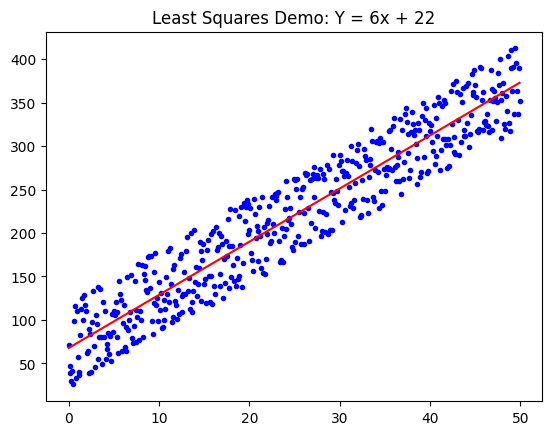

In [65]:
# Lets generate some data we'd like to use
X = np.arange(0, 50, 0.1)
y_b = np.random.randint(0, 50)
y_m = np.random.randint(0, 25)
Y = y_b + (y_m * X) + (np.random.random(len(X)) * 100)

def least_squares(X, Y):
  # Add a column of one's to X and make Y into explicitly a column vector
  x = np.vstack([X, np.ones(len(X))]).T
  y = Y[:, np.newaxis]

  # Compute the pseudo-inverse of a matrix using it's SVD (la.pinv)
  # Generate y parameters based off those to approximate the formula
  p_inv = la.pinv(x)
  y_params = np.dot(p_inv, y)

  # Rounding to make clean values
  return round(y_params[0][0], 3), round(y_params[1][0], 3)

# Conduct Least-Squares and plot the values and estimation on the graph
ls_m, ls_b = least_squares(X, Y)
plt.plot(X, Y, "b.", X, (X*ls_m + ls_b), "r")
plt.title("Least Squares Demo: Y = " + str(y_m) + "x + " + str(y_b))
plt.show()

**1.3.3 Linear Regression** - Linear Regression is a model that assumes we can find coefficients, **β**, to data points that minimize the difference between the given y values and the predicted y values. This turns the problem into the least squares problem.

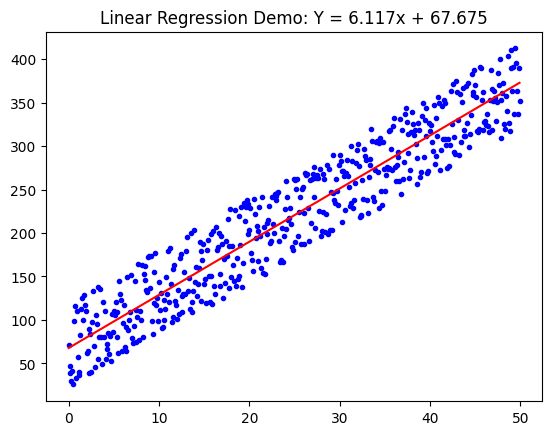

In [66]:
def lin_reg(X, Y):
  # Take the averages and find values to calculate slope and intercept
  x_avg = np.mean(X)
  y_avg = np.mean(Y)
  s_x = X - x_avg
  s_xx = np.sum(s_x * s_x)
  s_xy = np.dot((s_x), (Y-y_avg))
  slope = s_xy / s_xx
  intercept = y_avg - slope * x_avg
  # Rounding to make clean values
  return round(slope, 3), round(intercept, 3)

# Perform linear regression and plot the values and estimation on the graph
lr_m, lr_b = lin_reg(X, Y)
plt.plot(X, Y, "b.", X, (X*lr_m + lr_b), "r")
plt.title("Linear Regression Demo: Y = " + str(lr_m) + "x + " + str(lr_b))
plt.show()

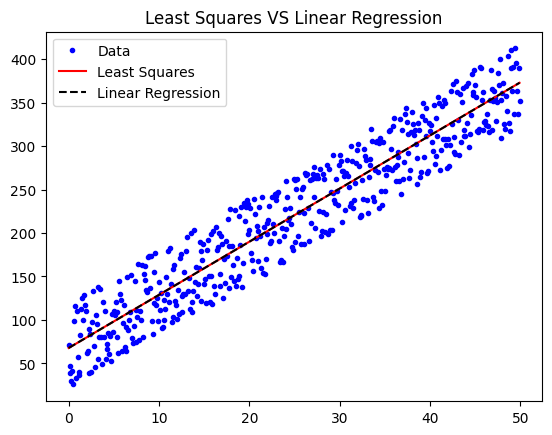

In [76]:
# Plot comparing both Least Squares and Linear Regression
plt.plot(X, Y, "b.", X, (X*ls_m + ls_b), "r", X, (X*lr_m + lr_b), "k--")
plt.title("Least Squares VS Linear Regression")
plt.legend(['Data', 'Least Squares', 'Linear Regression'])
plt.show()

**Least-Squares vs Linear Regression** - We can see that the two lines are incredibly similar as they are estimating the same data just slightly differently. Least Squares is an estimator to a model, minimizing the error between Ax and b. Regression however is generally your model, which will use something like Least Squares to find it's estimation.